In [1]:
import pyBigWig
import pandas as pd
import sys
sys.path.append('/home/hsher/rbp-maps/maps/')
from density.ReadDensity import ReadDensity
import os
from waveform import *
from pybedtools import BedTool
import matplotlib.pyplot as plt
from code_profile import timer

In [2]:
import pandas as pd
eclip_bam = pd.read_csv('/home/hsher/projects/peak_calling/ENCODE_FINAL_ANNOTATIONS.uidsonly.txt.manifesthg38.txt', sep = '\t', header= 0, index_col = 0)

In [3]:
eclip_bam.loc[eclip_bam['RBP'].isin(['HNRNPC', 'HNRNPK','RPS3', 'RPS11'])]

,RBP,Cell line,CLIP_rep1,CLIP_rep2,INPUT
uID,,,,,
203,HNRNPC,HepG2,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...
206,HNRNPK,HepG2,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...
326,HNRNPK,K562,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...
530,RPS3,K562,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...
540,RPS3,HepG2,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...
614,RPS11,K562,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...
699,HNRNPC,K562,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...


In [4]:
basedir = '/home/hsher/seqdata/eclip_raw/' # HepG2
neg = basedir + 'ENCFF891BFD.bigWig'
pos = basedir + 'ENCFF930WRN.bigWig'
bam = basedir + 'ENCFF162FHQ.bam'
HNRNPC = ReadDensity(pos, neg, bam = bam, name = 'HNRNPC')
HNRNPC_uid = 203


In [5]:
neg = basedir + 'ENCFF494CVZ.bigWig' #HepG2
pos = basedir + 'ENCFF078NBU.bigWig'
bam = basedir + 'ENCFF553XCL.bam'
HNRNPK = ReadDensity(pos, neg, bam = bam, name = 'HNRNPK')
HNRNPK_uid = 206

In [6]:
neg = basedir + 'ENCFF766RBQ.bigWig' #HepG2
pos = basedir + 'ENCFF984MNA.bigWig'
bam = basedir + 'ENCFF959SXJ.bam'
RPS3 = ReadDensity(pos, neg, bam = bam, name = 'RPS3')
RPS3_uid = 540

In [7]:
neg = basedir + 'ENCFF376NMQ.bigWig'
pos = basedir + 'ENCFF142OTS.bigWig'
bam = basedir + 'ENCFF896PKL.bam' #K562
RPS11 = ReadDensity(pos, neg, bam = bam, name = 'RPS11')
RPS11_uid = 614

# load IDR peaks

In [8]:
in_dir = '/home/hsher/seqdata/eclip_bed/' # sorted and merged peaks
HNRNPC_idr = BedTool(in_dir + str(HNRNPC_uid)+'.01v02.IDR.out.0102merged.bed.blacklist_removed.bed.narrowPeak.bed')
HNRNPK_idr = BedTool(in_dir + str(HNRNPK_uid)+'.01v02.IDR.out.0102merged.bed.blacklist_removed.bed.narrowPeak.bed')
RPS3_idr = BedTool(in_dir + str(RPS3_uid)+'.01v02.IDR.out.0102merged.bed.blacklist_removed.bed.narrowPeak.bed')
RPS11_idr = BedTool(in_dir + str(RPS11_uid)+'.01v02.IDR.out.0102merged.bed.blacklist_removed.bed.narrowPeak.bed')

In [9]:
# how many IDR peaks
print(len(HNRNPC_idr), len(HNRNPK_idr), len(RPS3_idr), len(RPS11_idr))

# some RBP are very sad

3275 5707 5659 48


# Length distribution of key transcript

In [10]:
# length distribution of IDR peaks
@timer
def length(features):
    return [f.stop-f.start for f in features]


Function "length" took 0.05085116811096668 seconds to complete.
Function "length" took 0.07069848105311394 seconds to complete.
Function "length" took 0.06863505579531193 seconds to complete.
Function "length" took 0.0014226045459508896 seconds to complete.


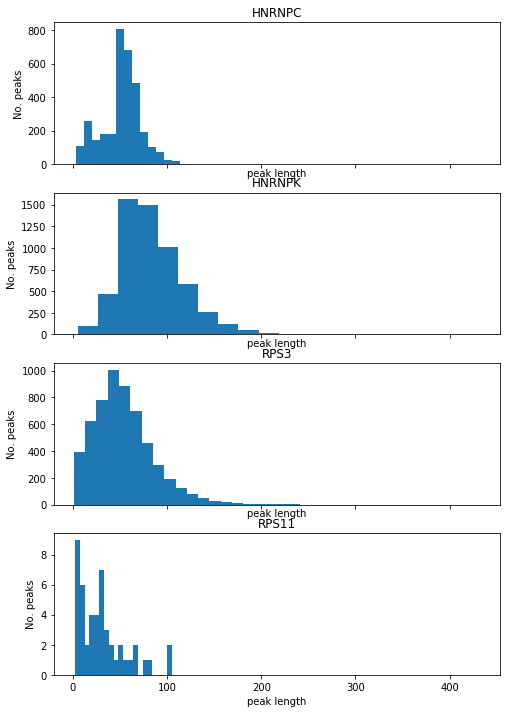

In [11]:
peaks = [HNRNPC_idr, HNRNPK_idr, RPS3_idr, RPS11_idr]
names = ['HNRNPC','HNRNPK', 'RPS3', 'RPS11']
f,ax = plt.subplots(4,1, figsize = (8,12), sharex = True)
for i in range(len(peaks)):
    ax[i].hist(length(peaks[i]), bins = 20)
    ax[i].set_title(names[i])
    ax[i].set_ylabel('No. peaks')
    ax[i].set_xlabel('peak length')


# where does RPS11 lost all those peaks

In [12]:


def lost_by_IDR(uID, IDR_peaks):
    ''' return peak from individual rep that are removed'''
    root_dir = '/home/elvannostrand/data/clip/CLIPseq_analysis/ENCODE_FINALforpapers_20180205/hg38/'
    
    substract_rep = []
    for rep in [1,2]:
        fname = '{0}_0{1}.basedon_{0}_0{1}.peaks.l2inputnormnew.bed.compressed.bed.blacklist_removed.bed'.format(uID, rep)
        r = BedTool(root_dir + fname)
        substract_rep.append(r.subtract(IDR_peaks, A = True))
    return substract_rep

In [13]:
RPS11_indv = lost_by_IDR(RPS11_uid, RPS11_idr)

In [14]:
# how many peaks are removed by IDR
[len(r) for r in RPS11_indv]

[9238, 14849]

In [15]:
def compare_pval(idr, indv_lost):
    ''' compare pvalue of IDR peaks and peaks lost from IDR
    return a list of list of -log10 pvalue ([rep1, rep2, idr])
    '''
    
    idr_pvals = []
    for i in range(len(idr)):
        idr_pvals.append(float(idr[i].fields[7]))
    
    total = []
    for rep in indv_lost:
        rep_pvals = []
        for i in range(1000):
            rep_pvals.append(float(rep[i].fields[3]))
        total.append(rep_pvals)
    total.append(idr_pvals)
    
    return total
    
    

In [16]:
pvals = compare_pval(RPS11_idr, RPS11_indv)

Text(0, 0.5, 'density')

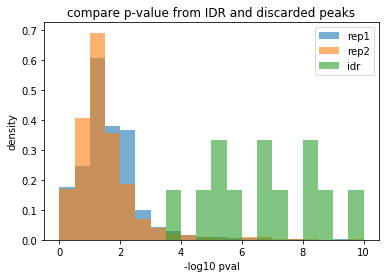

In [17]:
name = ['rep1', 'rep2', 'idr']
i=0
for p in pvals:
    plt.hist(p, label = name[i], alpha = 0.6, bins = 20, range = (0,10), density = True)
    i+=1
    
plt.legend()
plt.title('compare p-value from IDR and discarded peaks')
plt.xlabel('-log10 pval')
plt.ylabel('density')


In [18]:
def compare_fold(idr, indv_lost):
    ''' compare pvalue of IDR peaks and peaks lost from IDR
    return a list of list of log2 fold enrichment ([rep1, rep2, idr])
    '''
    
    idr_pvals = []
    for i in range(len(idr)):
        idr_pvals.append(float(idr[i].fields[6]))
    
    total = []
    for rep in indv_lost:
        rep_pvals = []
        for i in range(1000):
            rep_pvals.append(float(rep[i].fields[4]))
        total.append(rep_pvals)
    total.append(idr_pvals)
    
    return total
    
    

In [19]:
fold = compare_fold(RPS11_idr, RPS11_indv)

Text(0, 0.5, 'density')

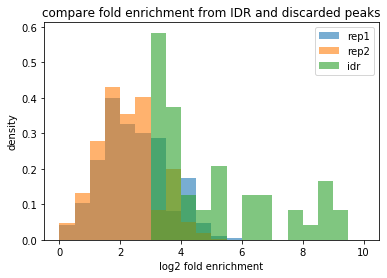

In [20]:
name = ['rep1', 'rep2', 'idr']
i=0
for p in fold:
    plt.hist(p, label = name[i], alpha = 0.6, bins = 20, range = (0,10), density = True)
    i+=1
    
plt.legend()
plt.title('compare fold enrichment from IDR and discarded peaks')
plt.xlabel('log2 fold enrichment')
plt.ylabel('density')


In [21]:
# compare peak length
lengths_ = [length(bed) for bed in RPS11_indv + [RPS11_idr]]

Function "length" took 0.08002643659710884 seconds to complete.
Function "length" took 0.12579358741641045 seconds to complete.
Function "length" took 0.001395002007484436 seconds to complete.


Text(0, 0.5, 'density')

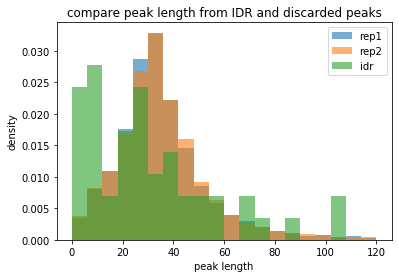

In [22]:
name = ['rep1', 'rep2', 'idr']
i=0
for p in lengths_:
    plt.hist(p, label = name[i], alpha = 0.6, bins = 20, range = (0,120), density = True)
    i+=1
    
plt.legend()
plt.title('compare peak length from IDR and discarded peaks')
plt.xlabel('peak length')
plt.ylabel('density')


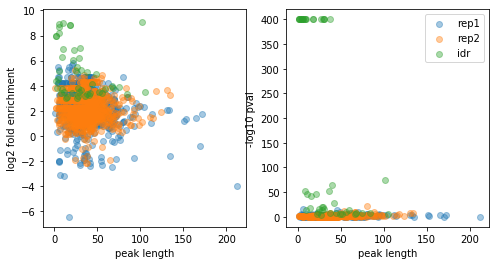

In [23]:
# what is the relationship between fold enrichment and peak length
name = ['rep1', 'rep2', 'idr']
f, ax = plt.subplots(1,2, figsize = (8,4))
for i in range(3):
    l = lengths_[i][:1000]
    f = fold[i]
    p = pvals[i]
    ax[0].scatter(l, f, label = name[i], alpha = 0.4)
    ax[1].scatter(l, p, label = name[i], alpha = 0.4)
ax[0].set_ylabel('log2 fold enrichment')
ax[1].set_ylabel('-log10 pval')
_=[ax[i].set_xlabel('peak length') for i in range(2)]
plt.legend()

In [24]:
uID = RPS11_uid
root_dir = '/home/elvannostrand/data/clip/CLIPseq_analysis/ENCODE_FINALforpapers_20180205/hg38/'
reps = []
for rep in [1,2]:
    fname = '{0}_0{1}.basedon_{0}_0{1}.peaks.l2inputnormnew.bed.compressed.bed.blacklist_removed.bed'.format(uID, rep)
    r = BedTool(root_dir + fname)
    reps.append(r)


In [25]:
[len(r) for r in reps]

[9285, 14892]

In [26]:
overlap_reps = reps[0].intersect(reps[1], wo = True, s = True)
len(overlap_reps)

3583

In [27]:
int(overlap_reps[0].fields[2])-int(overlap_reps[0].fields[1]) #78

95

In [28]:
int(overlap_reps[0].fields[8])-int(overlap_reps[0].fields[7]) #78

43

In [29]:

overlap_reps = reps[0].intersect(reps[1], wo = True, s = True)
rep1_p, rep1_f, rep2_p, rep2_f, seq_len, overlap_len = [],[],[],[],[],[]
for i in range(1000):
    rep1_p.append(float(overlap_reps[i].fields[3]))
    rep1_f.append(float(overlap_reps[i].fields[4]))
    rep2_p.append(float(overlap_reps[i].fields[9]))
    rep2_f.append(float(overlap_reps[i].fields[10]))
    
    seq_len.append(0.5*(int(overlap_reps[i].fields[2])-int(overlap_reps[i].fields[1])+int(overlap_reps[i].fields[8])-int(overlap_reps[i].fields[7])))
    overlap_len.append(min([int(overlap_reps[i].fields[2]), int(overlap_reps[i].fields[8])])-max([int(overlap_reps[i].fields[1]), int(overlap_reps[i].fields[7])]))




Text(0, 0.5, 'peak length')

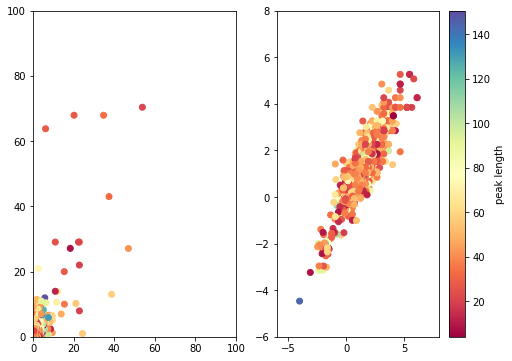

In [30]:
# assign color to length
import matplotlib as mpl
import matplotlib.cm as cm

norm = mpl.colors.Normalize(vmin=min(seq_len), vmax=max(seq_len))
cmap = cm.Spectral

m = cm.ScalarMappable(norm=norm, cmap=cmap)
seq_len_color = [m.to_rgba(x) for x in seq_len]

f,ax = plt.subplots(1,2, figsize = (8,6))
ax[0].scatter(rep1_p, rep2_p, color = seq_len_color)
ax[0].set_xlim([0, 100])
ax[0].set_ylim([0, 100])

ax[1].scatter(rep1_f, rep2_f, color =seq_len_color)
ax[1].set_xlim([-6, 8])
ax[1].set_ylim([-6, 8])
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap))
cbar.ax.set_ylabel('peak length')

In [31]:
max(overlap_len)

125

Text(0, 0.5, 'peak overlap length')

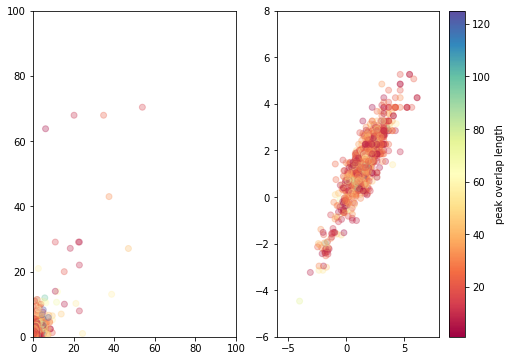

In [32]:
# assign color to length
norm = mpl.colors.Normalize(vmin=min(overlap_len), vmax=max(overlap_len))
cmap = cm.Spectral

m = cm.ScalarMappable(norm=norm, cmap=cmap)
seq_len_color = [m.to_rgba(x) for x in overlap_len]

f,ax = plt.subplots(1,2, figsize = (8,6))
ax[0].scatter(rep1_p, rep2_p, color = seq_len_color, alpha = 0.3)
ax[0].set_xlim([0, 100])
ax[0].set_ylim([0, 100])

ax[1].scatter(rep1_f, rep2_f, color =seq_len_color, alpha = 0.3)
ax[1].set_xlim([-6, 8])
ax[1].set_ylim([-6, 8])
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap))
cbar.ax.set_ylabel('peak overlap length')

In [33]:
# do they look different from IDR peaks?

# peak length
# compare
# signalValue = tag density [6] average fold enrichment
# pvalue/qvalue [7]log10 pval
# score fields[4]
# .strand[5]

# visualize raw density of IDR peaks

NameError: name 'get_raw_density' is not defined

In [ ]:
id_RPS11

In [ ]:
all_RPS11, id_RPS11 = get_raw_density(RPS11_idr, RPS11)